In [463]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"

# 데이터 읽기

penguins = pd.read_csv(url)

In [464]:
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2     

In [465]:
#결측치 확인
missing_values = df.isnull().sum()
print(missing_values)

# 결측치 제거
penguins.dropna(inplace=True)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [469]:
print(penguins.head()) 
print(penguins.isnull().sum()) 

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE  
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [471]:
# 원-핫 인코딩: sex, island 등 문자열 모두 포함해서
penguins_encoded = pd.get_dummies(penguins, drop_first=True)

X = penguins.drop('species', axis=1)
y = penguins['species']

#원핫 인코딩(마지막 열)
X_encoded = pd.get_dummies(X, drop_first=True)

#인코딩 된 X 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

#Y 스케일링
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_encoded)

In [473]:
#Train/Test 분할

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

In [475]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

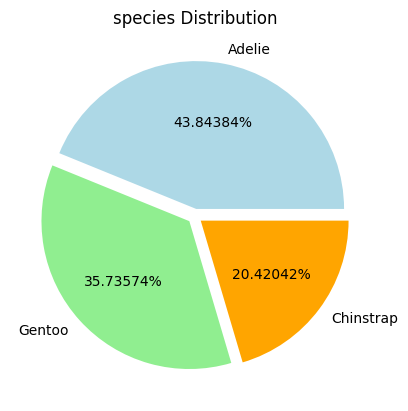

In [477]:
import matplotlib.pyplot as plt

penguins.species.value_counts().plot(
    kind='pie',
    autopct='%0.05f%%',
    colors=['lightblue', 'lightgreen', 'orange', 'pink'],
    explode=(0.05, 0.05, 0.05) #타겟 분류 종류갯수 만큼
)
plt.title("species Distribution")
plt.ylabel("")  # y축 라벨 없애기
plt.show()

In [479]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [481]:
columns = ['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex']

In [483]:
#딥러닝
X_train = torch.tensor(np.array(X_train), dtype=torch.float32)
y_train = torch.tensor(np.array(y_train), dtype=torch.int64)
X_test = torch.tensor(np.array(X_test), dtype=torch.float32)
y_test = torch.tensor(np.array(y_test), dtype=torch.int64)

In [485]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [487]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([266, 7]),
 torch.Size([67, 7]),
 torch.Size([266]),
 torch.Size([67]))

In [489]:
#Pytorch model 정의

class SpeciesOutcome(nn.Module):
    def __init__(self):
        super(SpeciesOutcome, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 4)  # 4 classes in the dataset
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = SpeciesOutcome()

In [491]:
#손실 함수 최적화 기법

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [493]:
#모델 학습

train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 1.3609, Accuracy: 50.75%
Epoch 2/20, Loss: 1.2326, Accuracy: 89.55%
Epoch 3/20, Loss: 1.0822, Accuracy: 95.52%
Epoch 4/20, Loss: 0.9013, Accuracy: 97.01%
Epoch 5/20, Loss: 0.7124, Accuracy: 98.51%
Epoch 6/20, Loss: 0.5294, Accuracy: 98.51%
Epoch 7/20, Loss: 0.3777, Accuracy: 98.51%
Epoch 8/20, Loss: 0.2618, Accuracy: 98.51%
Epoch 9/20, Loss: 0.1788, Accuracy: 100.00%
Epoch 10/20, Loss: 0.1329, Accuracy: 100.00%
Epoch 11/20, Loss: 0.0991, Accuracy: 100.00%
Epoch 12/20, Loss: 0.0779, Accuracy: 100.00%
Epoch 13/20, Loss: 0.0622, Accuracy: 100.00%
Epoch 14/20, Loss: 0.0592, Accuracy: 100.00%
Epoch 15/20, Loss: 0.0418, Accuracy: 100.00%
Epoch 16/20, Loss: 0.0369, Accuracy: 100.00%
Epoch 17/20, Loss: 0.0349, Accuracy: 100.00%
Epoch 18/20, Loss: 0.0290, Accuracy: 100.00%
Epoch 19/20, Loss: 0.0264, Accuracy: 100.00%
Epoch 20/20, Loss: 0.0231, Accuracy: 100.00%
Training complete.


In [495]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
F1 Score: 1.00
Precision: 1.00
Recall: 1.00
Specificity: 1.00


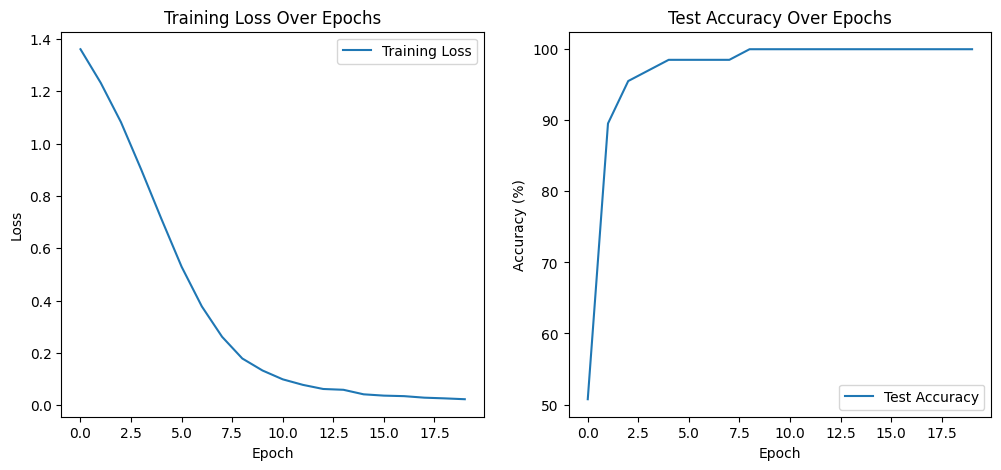

In [497]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()

In [499]:
# 데이터와 타겟 분리
X = penguins.drop('species', axis=1).values
y = penguins['species'].values

In [501]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(island_encoded)

In [503]:
data_array = np.hstack((X, y.reshape(-1, 1)))

In [505]:
data_array.shape

(333, 3)

In [507]:
# Split sequences function
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Apply sequence transformation
n_steps = 5
X, y = split_sequences(data_array, n_steps)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [509]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((263, 5, 2), (263,), (66, 5, 2), (66,))

In [511]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42)

In [513]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train.astype(np.float32))
X_test = torch.tensor(X_test.astype(np.float32))

# y는 int로 변환
y_train = torch.tensor(np.array(y_train), dtype=torch.int64)
y_test = torch.tensor(np.array(y_test), dtype=torch.int64)


# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [542]:
# Define the 1D CNN model
class SpeciesOutcomeCNN(nn.Module):
    def __init__(self):
        super(SpeciesOutcomeCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 7, 64)  # 7은 sequence_length
        self.fc2 = nn.Linear(64, 3)       # 클래스 수

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [544]:
model = SpeciesOutcomeCNN()

In [546]:
from torchsummary import summary
summary(model, input_size=(1, 7))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1                [-1, 16, 7]              64
            Conv1d-2                [-1, 32, 7]           1,568
            Linear-3                   [-1, 64]          14,400
            Linear-4                    [-1, 3]             195
Total params: 16,227
Trainable params: 16,227
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.07
----------------------------------------------------------------


In [548]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

In [584]:
# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        inputs = inputs.unsqueeze(1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        # Calculate average loss over an epoch
        train_losses.append(running_loss / len(train_dataloader))

# Evaluate on test data
        model.eval()
        correct = 0
        total = 0
        all_labels = []
        all_predictions = []
        with torch.no_grad():
            for inputs, labels in test_dataloader:
                inputs = inputs.unsqueeze(1)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())

        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

    print("Training complete.")
    

Epoch 1/20, Loss: 0.0000, Accuracy: 100.00%
Epoch 1/20, Loss: 0.0000, Accuracy: 100.00%
Epoch 1/20, Loss: 0.0000, Accuracy: 100.00%
Epoch 1/20, Loss: 0.0000, Accuracy: 100.00%
Epoch 1/20, Loss: 0.0001, Accuracy: 100.00%
Epoch 1/20, Loss: 0.0001, Accuracy: 100.00%
Epoch 1/20, Loss: 0.0001, Accuracy: 100.00%
Epoch 1/20, Loss: 0.0001, Accuracy: 100.00%
Epoch 1/20, Loss: 0.0003, Accuracy: 100.00%
Training complete.
Epoch 2/20, Loss: 0.0000, Accuracy: 100.00%
Epoch 2/20, Loss: 0.0001, Accuracy: 100.00%
Epoch 2/20, Loss: 0.0001, Accuracy: 100.00%
Epoch 2/20, Loss: 0.0001, Accuracy: 100.00%
Epoch 2/20, Loss: 0.0001, Accuracy: 100.00%
Epoch 2/20, Loss: 0.0001, Accuracy: 100.00%
Epoch 2/20, Loss: 0.0001, Accuracy: 100.00%
Epoch 2/20, Loss: 0.0002, Accuracy: 100.00%
Epoch 2/20, Loss: 0.0002, Accuracy: 100.00%
Training complete.
Epoch 3/20, Loss: 0.0000, Accuracy: 100.00%
Epoch 3/20, Loss: 0.0000, Accuracy: 100.00%
Epoch 3/20, Loss: 0.0000, Accuracy: 100.00%
Epoch 3/20, Loss: 0.0001, Accuracy: 10

In [586]:
# Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

In [588]:
# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

In [590]:
# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

In [592]:
# Print metrics
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
F1 Score: 1.00
Precision: 1.00
Recall: 1.00
Specificity: 1.00


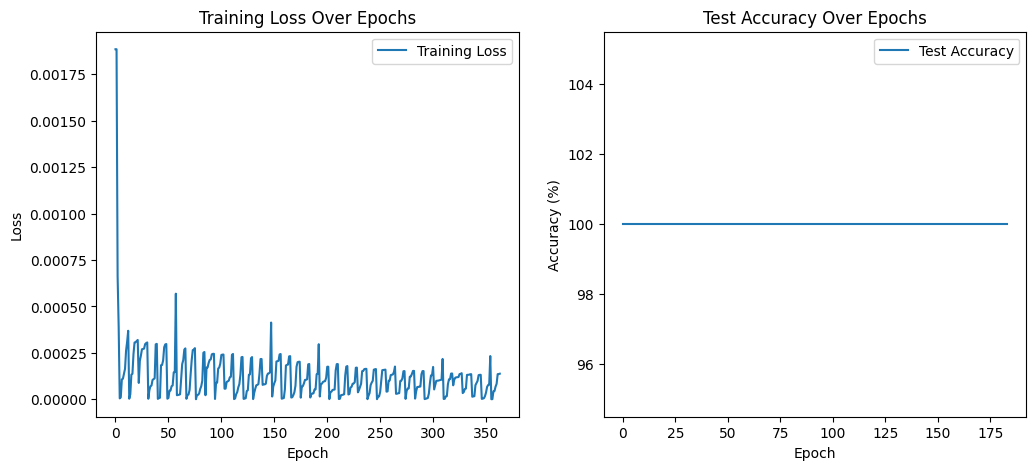

In [594]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()